# Data Collection and Analysis

#### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math

Load data from file

In [23]:
file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_onestep.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

([0, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 10, 0, 10, 0, 0, 0, 0, 10, 10, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 10, 0, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 0, 10, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 0, 

Plot score data

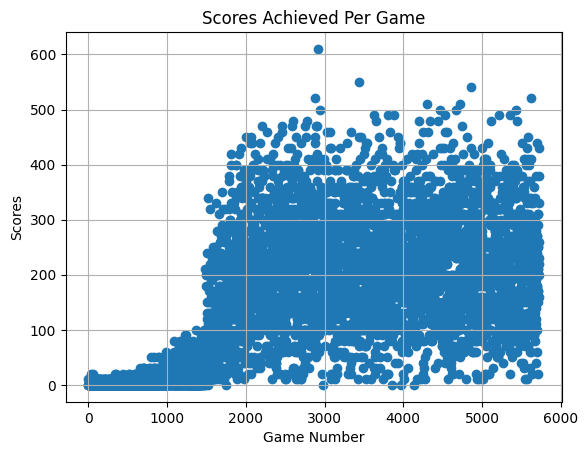

In [24]:
scores = data[0]
games = list(range(len(scores)))

plt.scatter(games, scores)
plt.title('Scores Achieved Per Game')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

Plot Running Mean Score

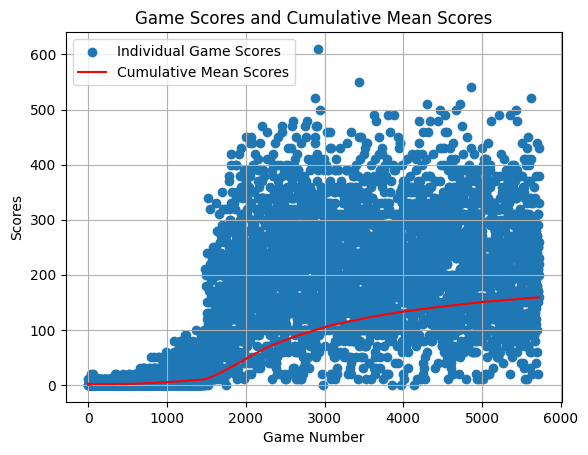

In [25]:
cumulative_mean_scores = data[1]

plt.scatter(games, scores, label='Individual Game Scores')
plt.plot(games, cumulative_mean_scores, label='Cumulative Mean Scores', color='red')
plt.title('Game Scores and Cumulative Mean Scores')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

Plot 95% Confidence Intervals

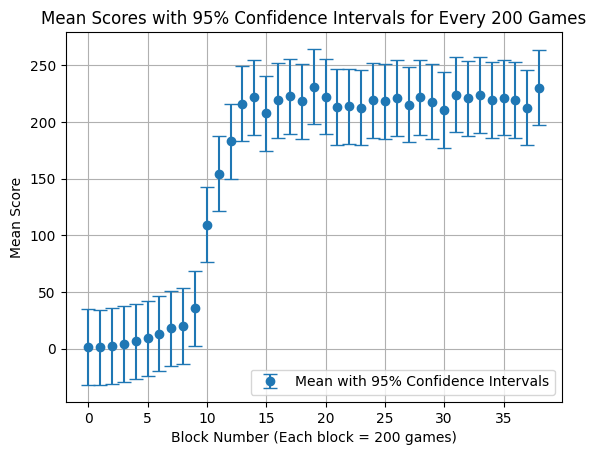

In [29]:
block_size = 150
mean_scores = []
confidence_intervals = []

for i in range(0, len(scores), block_size):
    block = scores[i:i + block_size]
    if len(block) == 0:
        continue

    mean = np.mean(block)
    std_dev = np.std(block)

    ci = 1.96 * (std_dev / math.sqrt(len(block)))
    mean_scores.append(mean)
    confidence_intervals.append(ci)

blocks = list(range(len(mean_scores)))
plt.errorbar(blocks, mean_scores, yerr=ci, fmt='o', capsize=5, label='Mean with 95% Confidence Intervals')
plt.title('Mean Scores with 95% Confidence Intervals for Every 150 Games')
plt.xlabel('Block Number (Each block = 150 games)')
plt.ylabel('Mean Score')
plt.grid(True)
plt.legend()
plt.show()


